In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
heart_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\jonim\AppData\Local\Temp\ipykernel_26868\1813240404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= heart_df["DEATH_EVENT"], palette= cols)


[Text(0, 0, '203')]

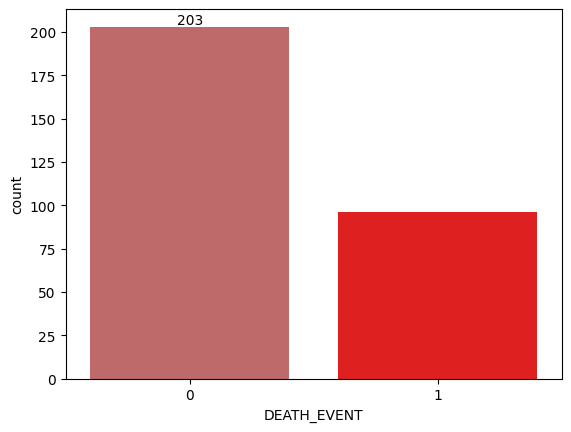

In [4]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= heart_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

In [5]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

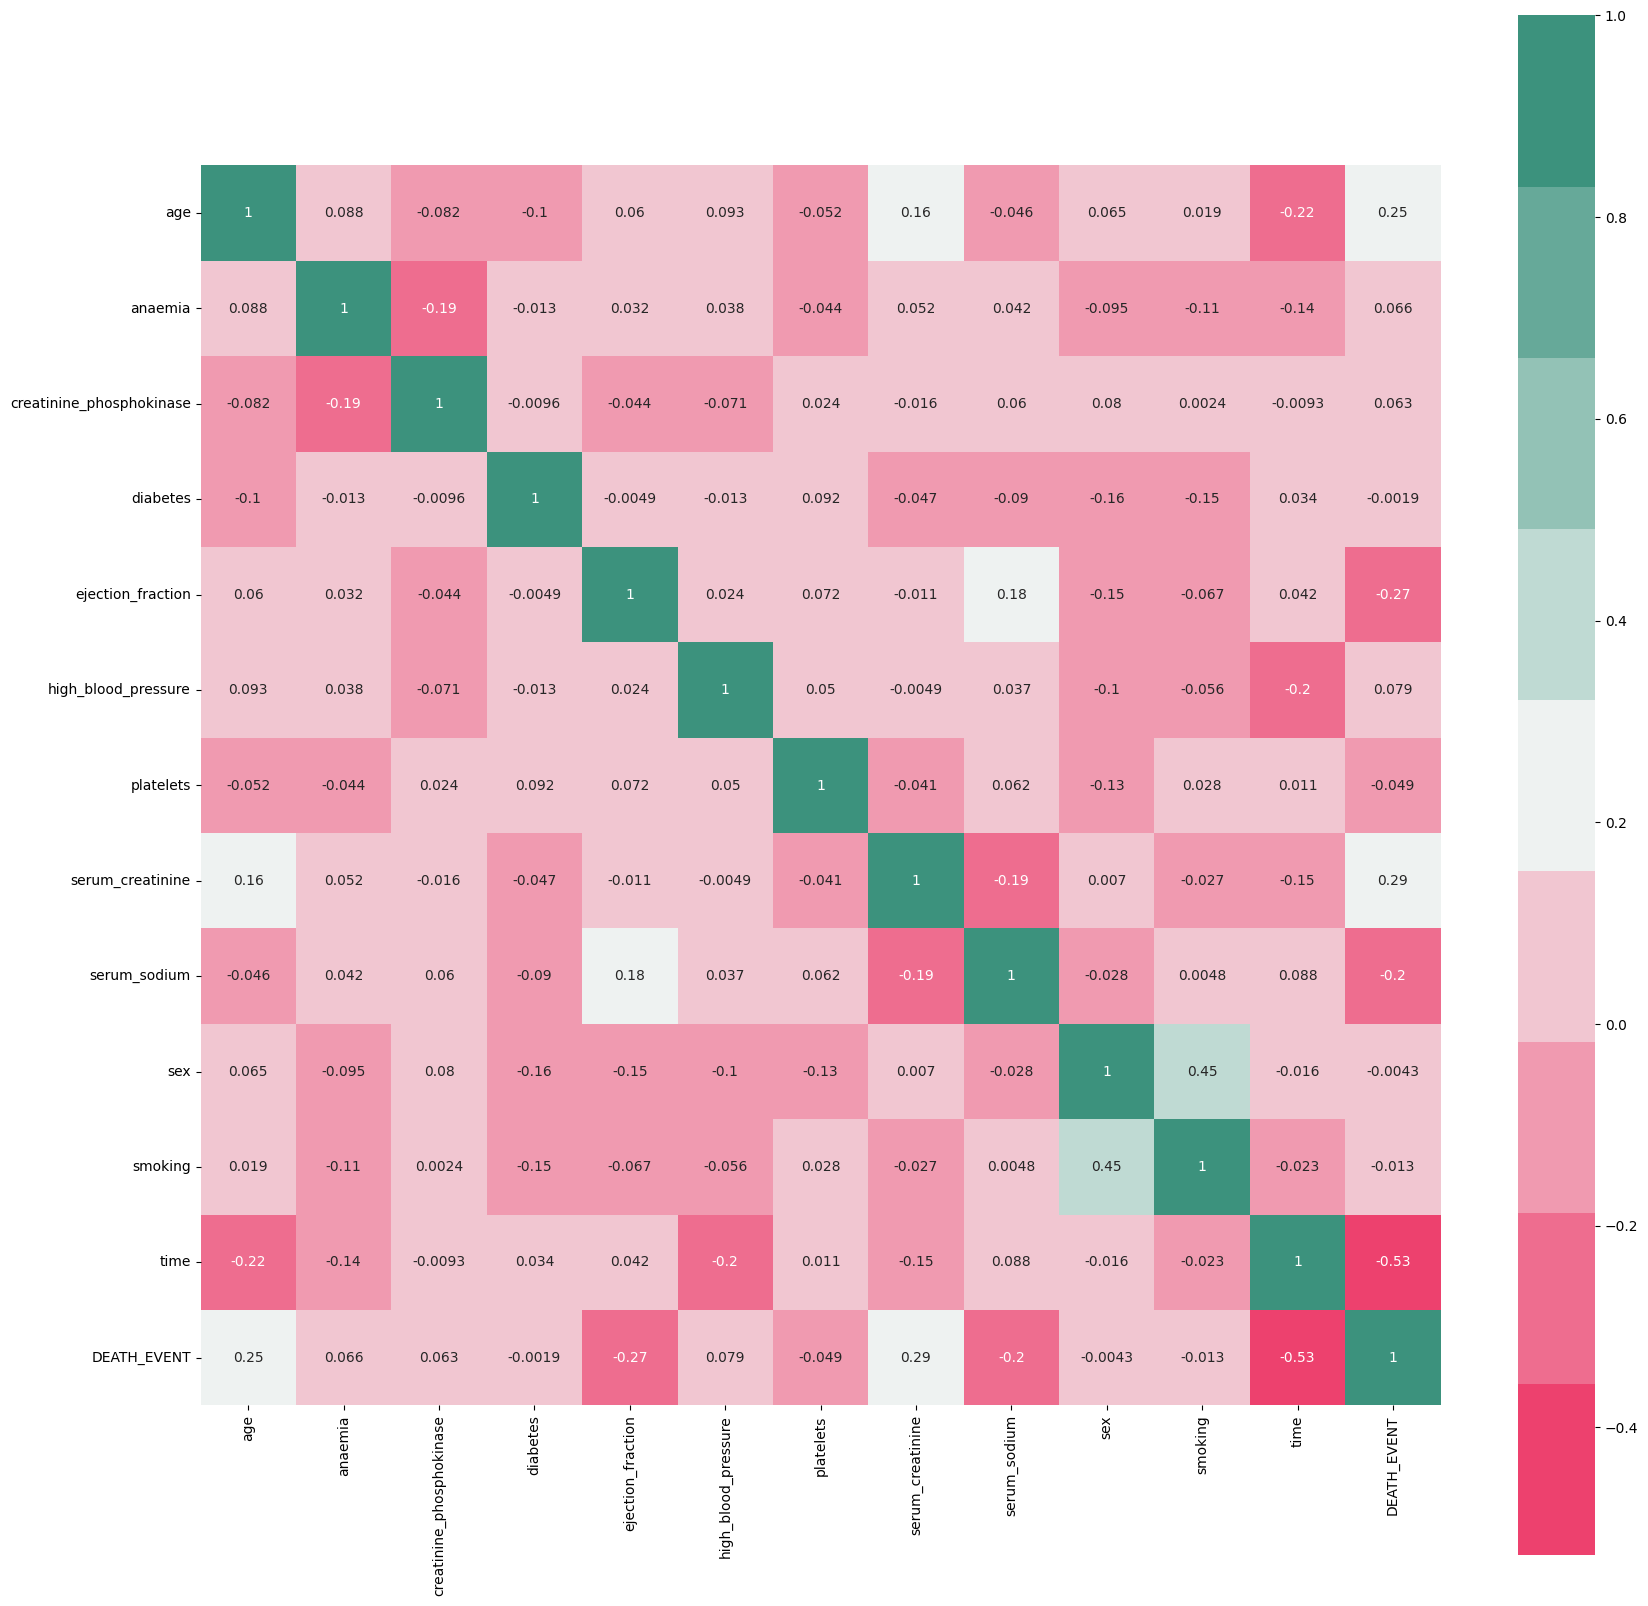

In [6]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = heart_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [7]:
x=heart_df.drop(["DEATH_EVENT"],axis=1)
y=heart_df["DEATH_EVENT"]

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.8, shuffle = True, random_state = 0)

In [9]:
sns.__version__

'0.13.2'

In [10]:
model=SVC()

In [11]:
model.fit(x_train, y_train)

SVC()

In [12]:
pred=model.predict(x_test)

In [13]:
print(confusion_matrix(y_test,pred))

[[162   4]
 [ 74   0]]


<Axes: >

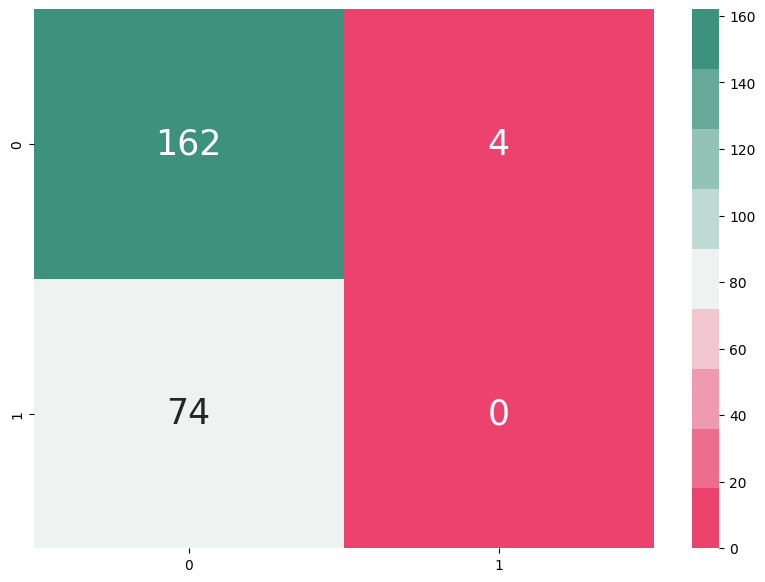

In [14]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':25}, fmt='d')

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       166
           1       0.00      0.00      0.00        74

    accuracy                           0.68       240
   macro avg       0.34      0.49      0.40       240
weighted avg       0.47      0.68      0.56       240



## Scaled

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_scaled = scaler.transform(x)
heart_df_scaled = pd.DataFrame(x_scaled)
heart_df_scaled["DEATH_EVENT"] = y
heart_df_scaled.columns = heart_df.columns
heart_df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.219452,-0.771100,-0.075172,-0.950382,-1.896379,1.207615,0.066610,0.319758,-1.726847,0.716115,-0.662589,-1.664451,1
1,-0.462879,-0.771100,5.529624,-0.950382,-0.255014,-0.828079,0.050375,-0.275845,-0.331176,0.716115,-0.662589,-1.638430,1
2,0.378286,-0.771100,-0.410890,-0.950382,-1.896379,-0.828079,-0.951816,-0.126944,-1.959459,0.716115,1.509231,-1.625420,1
3,-0.883462,1.296849,-0.437840,-0.950382,-1.896379,-0.828079,-0.477209,0.319758,-0.098564,0.716115,-0.662589,-1.625420,1
4,0.378286,1.296849,-0.400110,1.052209,-1.896379,-0.828079,0.679644,0.915360,-4.983412,-1.396424,-0.662589,-1.612409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.125937,-0.771100,-0.476340,1.052209,-0.255014,1.207615,-1.021029,-0.275845,1.297106,0.716115,1.509231,1.796319,0
295,-0.462879,-0.771100,0.878082,-0.950382,-0.255014,-0.828079,0.116049,-0.201394,0.366659,-1.396424,-0.662589,1.809330,0
296,-1.304044,-0.771100,1.062881,1.052209,1.751099,-0.828079,4.783012,-0.499196,0.134047,-1.396424,-0.662589,1.900403,0
297,-1.304044,-0.771100,1.334689,-0.950382,-0.255014,-0.828079,-1.169344,-0.052494,0.599271,0.716115,1.509231,1.926423,0


In [18]:
# sns.pairplot(data=heart_df_scaled, hue='DEATH_EVENT', palette='Set2')

In [19]:
model=SVC(kernel="linear")

In [20]:
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [21]:
x_test_scaled = scaler.transform(x_test)

pred=model.predict(x_test_scaled)

In [22]:
print(confusion_matrix(y_test,pred))

[[122  44]
 [ 15  59]]


<Axes: >

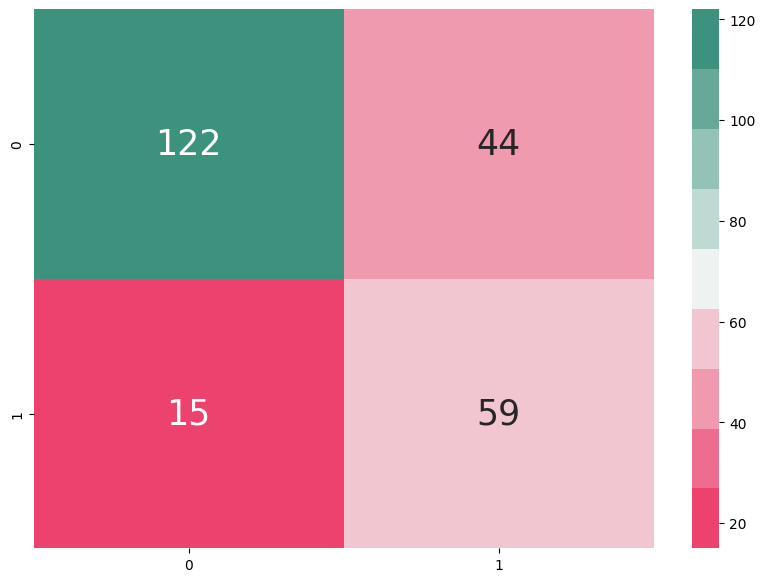

In [23]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':25}, fmt='d')



In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.81       166
           1       0.57      0.80      0.67        74

    accuracy                           0.75       240
   macro avg       0.73      0.77      0.74       240
weighted avg       0.79      0.75      0.76       240



## kNN

In [25]:
split_ratios = [0.8]
# k_values = range(1, 6)
k_values = [1, 50]
results = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(heart_df_scaled,heart_df['DEATH_EVENT'],
                                                    test_size=ratio, shuffle = True, random_state = 0)

    for K in k_values:
        knn = KNeighborsClassifier(K)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Train/Test Split': f"{round(ratio * 100)}/{round((1 - ratio) * 100)}",
            'K': K,
            'Accuracy Score': accuracy
        })

results_df = pd.DataFrame(results)

print(results_df)

  Train/Test Split   K  Accuracy Score
0            80/20   1        0.725000
1            80/20  50        0.691667


## SVM Linear Loop

Confusion Matrix for C=1 and test ratio=0.8:


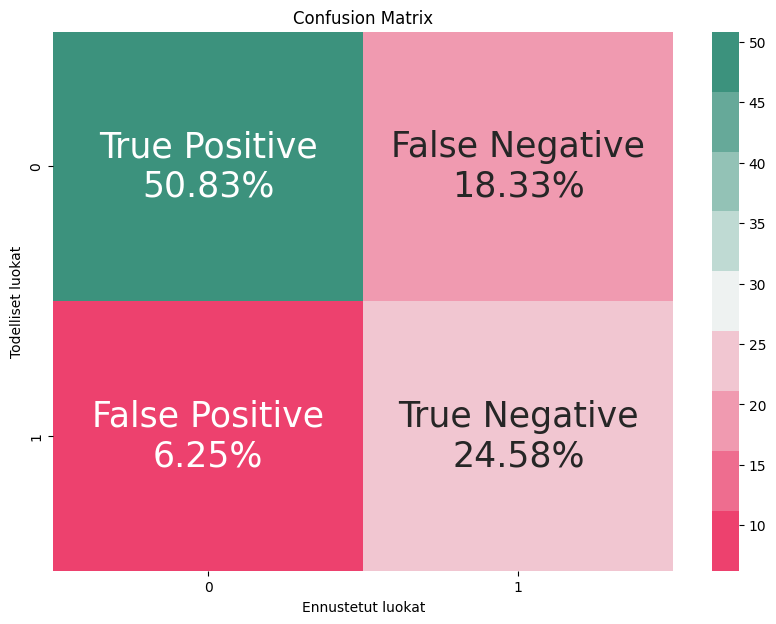

              precision    recall  f1-score   support

           0       0.89      0.73      0.81       166
           1       0.57      0.80      0.67        74

    accuracy                           0.75       240
   macro avg       0.73      0.77      0.74       240
weighted avg       0.79      0.75      0.76       240



Confusion Matrix for C=50 and test ratio=0.8:


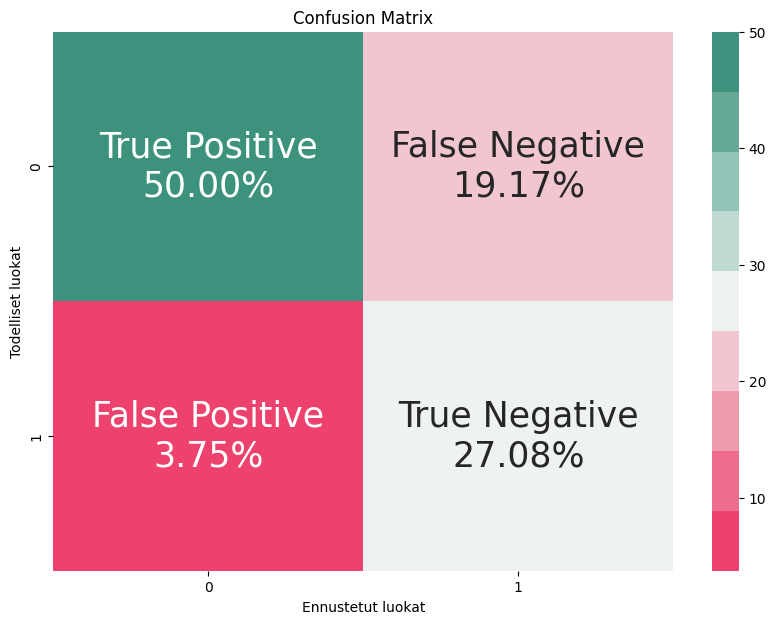

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       166
           1       0.59      0.88      0.70        74

    accuracy                           0.77       240
   macro avg       0.76      0.80      0.76       240
weighted avg       0.82      0.77      0.78       240





In [ ]:
X = heart_df.drop(columns=['DEATH_EVENT'])
y = heart_df['DEATH_EVENT']

split_ratios = [0.8]
c_values = [1, 50]
results = []

for test_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True, random_state=0)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for C in c_values:
        model = SVC(kernel="linear", C=C)
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        
        print(f"Confusion Matrix for C={C} and test ratio={test_ratio}:")
        cf_matrix = confusion_matrix(y_test, pred)
        # print(confusion_matrix(y_test, pred))
        
        # VANHA, pelkät luvut.
        # cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
        # plt.subplots(figsize=(10,7))
        # sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':25}, fmt='d')


        # UUSI, normalisoidaan ja muunnetaan prosenttiluvuiksi.
        cf_matrix_normalized_total = cf_matrix / cf_matrix.sum() * 100

        labels = np.array([
            ["True Positive\n{:.2f}%".format(cf_matrix_normalized_total[0, 0]), 
            "False Negative\n{:.2f}%".format(cf_matrix_normalized_total[0, 1])],
            ["False Positive\n{:.2f}%".format(cf_matrix_normalized_total[1, 0]), 
            "True Negative\n{:.2f}%".format(cf_matrix_normalized_total[1, 1])]
        ])

        cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
        plt.subplots(figsize=(10, 7))
        sns.heatmap(cf_matrix_normalized_total, cmap=cmap1, annot=labels, annot_kws={'size': 25}, fmt="", cbar=True)
        plt.title("Confusion Matrix")
        plt.xlabel("Ennustetut luokat")
        plt.ylabel("Todelliset luokat")
        plt.show()

        print(classification_report(y_test, pred))
        print("\n")
